In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import qutip
import itertools

In [23]:
terms = [''.join(_) for _ in itertools.product(['XZ', 'YI'], repeat=4)]
[term for term in terms if term.count('I') % 2 == 1]

['XZXZXZYI',
 'XZXZYIXZ',
 'XZYIXZXZ',
 'XZYIYIYI',
 'YIXZXZXZ',
 'YIXZYIYI',
 'YIYIXZYI',
 'YIYIYIXZ']

In [41]:
terms = ['YIXZ\nXZXZ', 'YIXZ\nYIYI', 'YIYI\nXZYI', 'YIYI\nYIXZ',
         'XZXZ\nXZXZ', 'XZXZ\nYIYI', 'XZYI\nXZYI', 'XZYI\nYIXZ',
         'YIXZ\nXZYI', 'YIXZ\nYIXZ', 'YIYI\nXZXZ', 'YIYI\nYIYI',
         'XZXZ\nXZYI', 'XZXZ\nYIXZ', 'XZYI\nXZXZ', 'XZYI\nYIYI']

In [35]:
pauli_to_matrix = {'I': qutip.identity(2),
                   'X': qutip.sigmax(),
                   'Y': qutip.sigmay(),
                   'Z': qutip.sigmaz()}


def commutes(term1, term2):
    term1 = [char for char in term1 if char != '\n']
    term2 = [char for char in term2 if char != '\n']
    term1_matrices = [pauli_to_matrix[pauli] for pauli in term1]
    term2_matrices = [pauli_to_matrix[pauli] for pauli in term2]
    return qutip.commutator(qutip.tensor(*term1_matrices), qutip.tensor(*term2_matrices)).norm() == 0

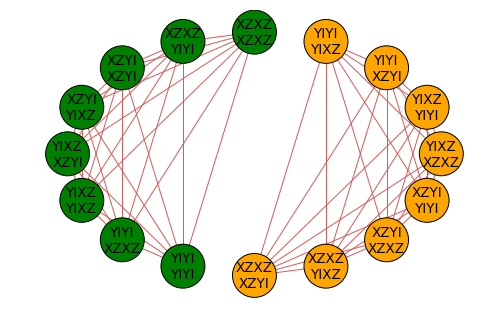

In [44]:
G = nx.Graph()
node_color = []
for term in terms:
    if term in ['XZXZ\nXZXZ', 'XZXZ\nYIYI', 'XZYI\nXZYI', 'XZYI\nYIXZ', 'YIXZ\nXZYI', 'YIXZ\nYIXZ', 'YIYI\nXZXZ', 'YIYI\nYIYI']:
        node_color.append('green')
    else:
        node_color.append('orange')
    G.add_node(term)

colors = []
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if commutes(terms[i], terms[j]):
            G.add_edge(terms[i], terms[j], color='b')
            colors.append('#d95b59')
                
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_family="Times", font_size=13.5,
        node_color=node_color, node_size=1930, edge_color=colors)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
plt.savefig("BK_pqrs_term.svg")